#### **Cancer Prediction Model Using Support Vector Machine(SVM)**
###### Predict if cancer is Benign or malignant. Using historical data about patients diagnosed with cancer enables doctors to differentiate malignant cases and benign ones are given independent attributes.

In [1]:
# Load the relevant libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the breast cancer datasets
from sklearn.datasets import load_breast_cancer

# Import SVM and decision boundary display.
from sklearn.svm import SVC
from sklearn.inspection import DecisionBoundaryDisplay

# Import train test split and metrics.
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV

In [2]:
# load the dataset into dataframe df.
df = load_breast_cancer()

# Create dataframe with columns name.
df = pd.DataFrame(np.c_[df['data'], df['target']], columns = np.append(df['feature_names'], ['target']))

df.head()


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


In [3]:
# Display basic information about the dataframe
print("Data Info:")
df.info()
print("\n")

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness erro

In [6]:
# Display basic information about the dataframe
print("Data Description:")
print(df.describe())
print("\n")

Data Description:
       mean radius  mean texture  mean perimeter    mean area  \
count   569.000000    569.000000      569.000000   569.000000   
mean     14.127292     19.289649       91.969033   654.889104   
std       3.524049      4.301036       24.298981   351.914129   
min       6.981000      9.710000       43.790000   143.500000   
25%      11.700000     16.170000       75.170000   420.300000   
50%      13.370000     18.840000       86.240000   551.100000   
75%      15.780000     21.800000      104.100000   782.700000   
max      28.110000     39.280000      188.500000  2501.000000   

       mean smoothness  mean compactness  mean concavity  mean concave points  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.0

In [7]:
# Display the number of missing values per column
print("Missing Values:")
print(df.isnull().sum())
print("\n")

Missing Values:
mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64




In [8]:
# Display the distribution of the target variable
print("Target Variable Distribution:")
print(df['target'].value_counts())
print("\n")

Target Variable Distribution:
target
1.0    357
0.0    212
Name: count, dtype: int64




In [10]:
# Display the correlation matrix
print("Correlation Matrix:")
correlation_matrix = df.corr()

# Display the top 10 positive and negative correlations with the target
print("Top 10 positive correlations with target:")
print(correlation_matrix['target'].sort_values(ascending=False).head(10))
print("\n")
print("Top 10 negative correlations with target:")
print(correlation_matrix['target'].sort_values(ascending=True).head(10))


Correlation Matrix:
Top 10 positive correlations with target:
target                     1.000000
smoothness error           0.067016
mean fractal dimension     0.012838
texture error              0.008303
symmetry error             0.006522
fractal dimension error   -0.077972
concavity error           -0.253730
compactness error         -0.292999
worst fractal dimension   -0.323872
mean symmetry             -0.330499
Name: target, dtype: float64


Top 10 negative correlations with target:
worst concave points   -0.793566
worst perimeter        -0.782914
mean concave points    -0.776614
worst radius           -0.776454
mean perimeter         -0.742636
worst area             -0.733825
mean radius            -0.730029
mean area              -0.708984
mean concavity         -0.696360
worst concavity        -0.659610
Name: target, dtype: float64


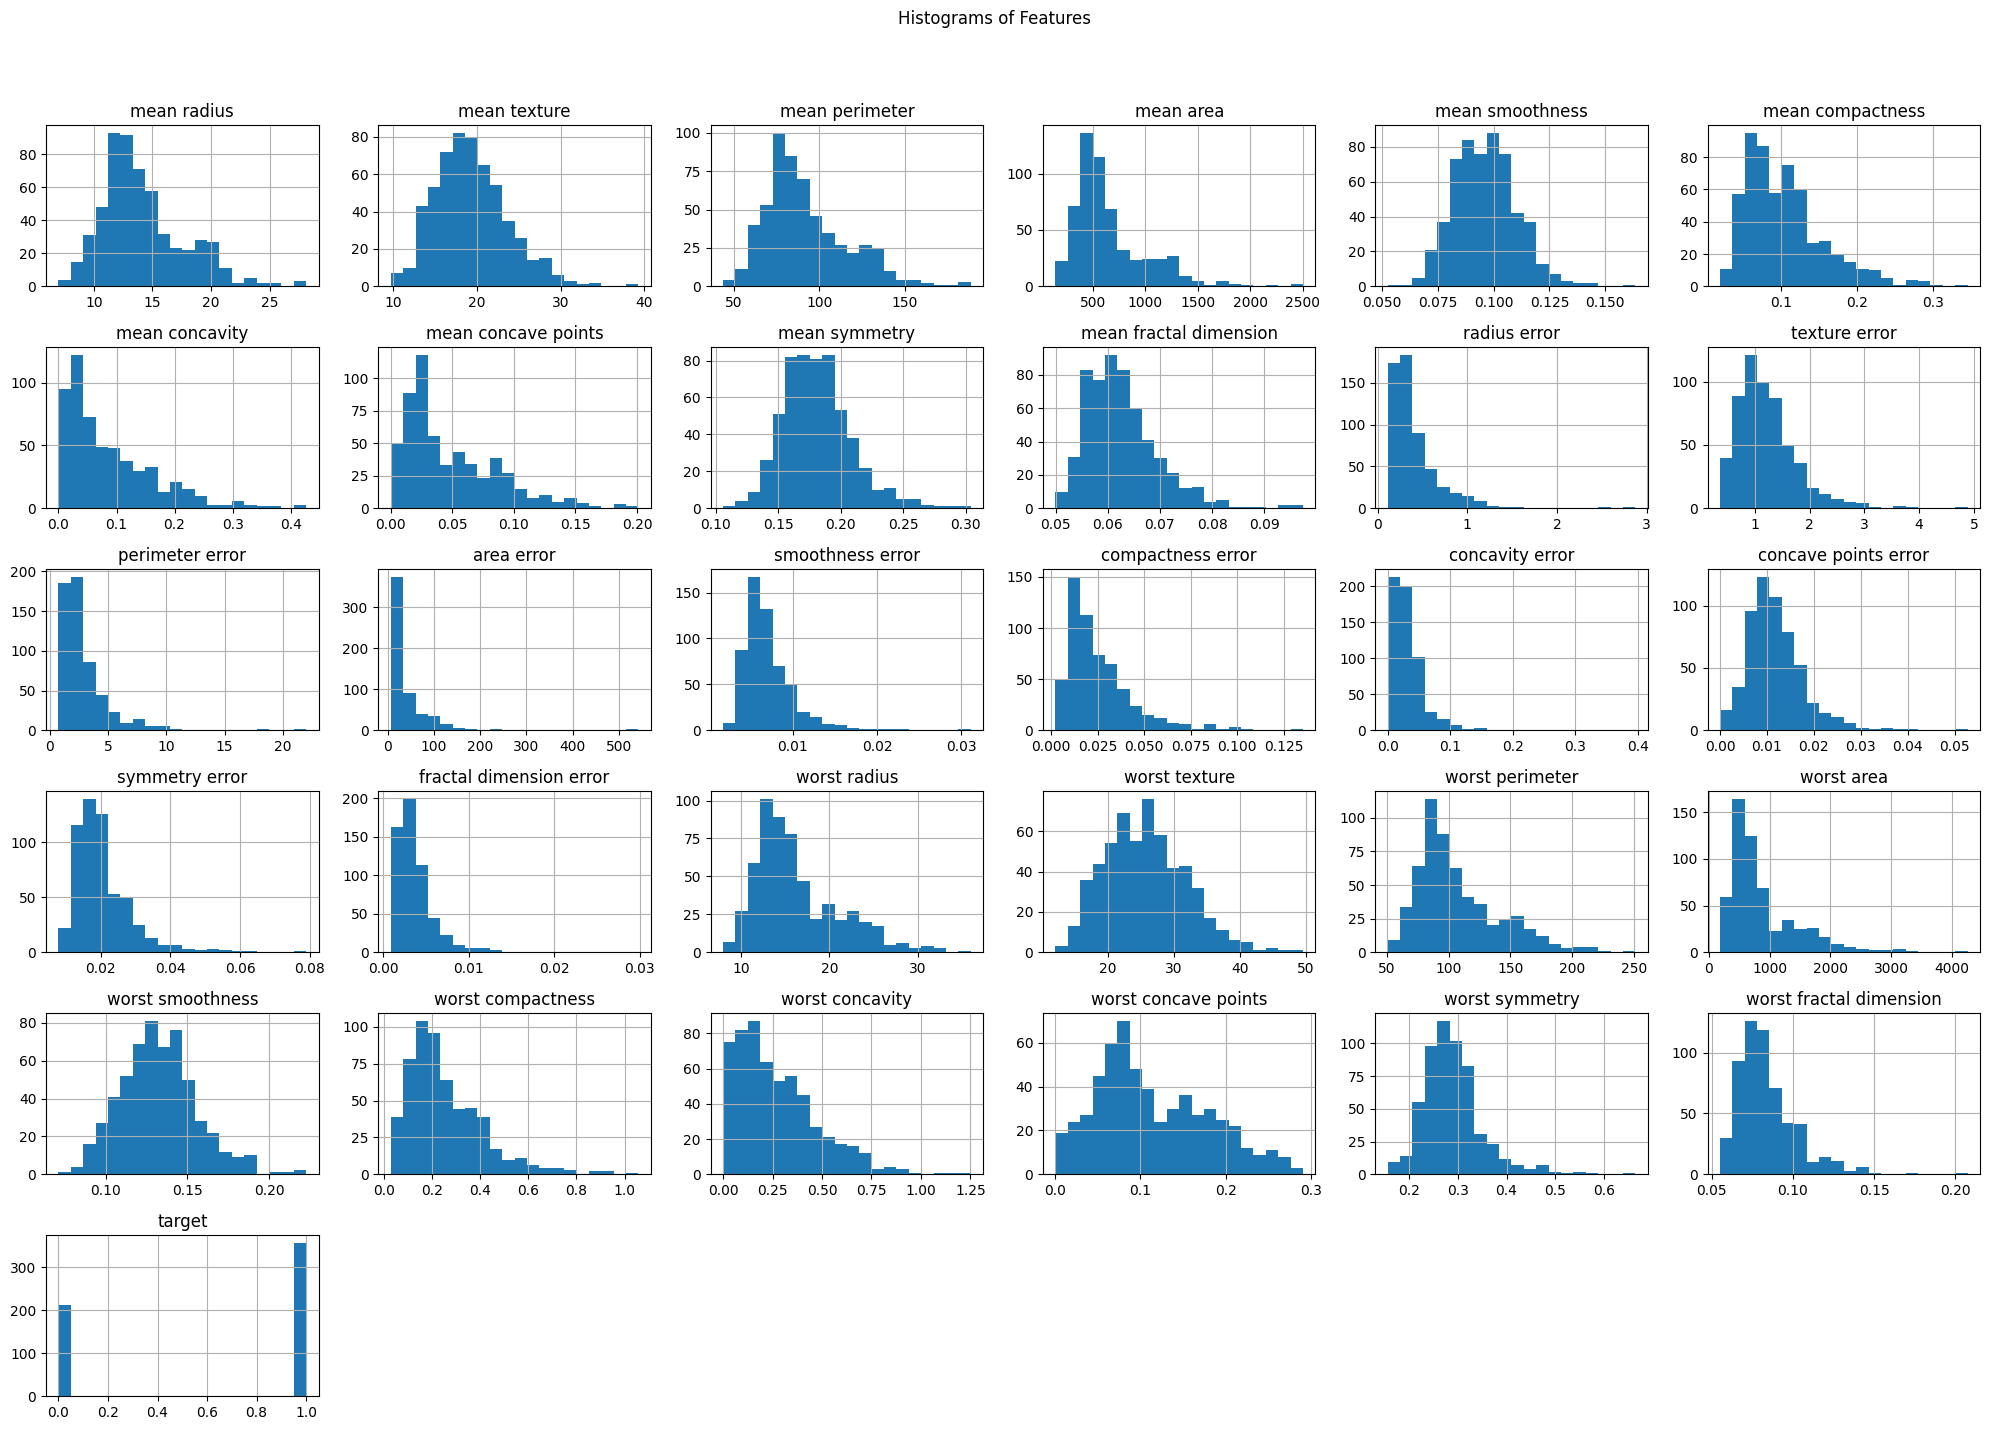

In [11]:
# Plot histograms for all features
df.hist(bins=20, figsize=(20, 15))
plt.suptitle("Histograms of Features")
plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust layout to prevent title overlap
plt.show()

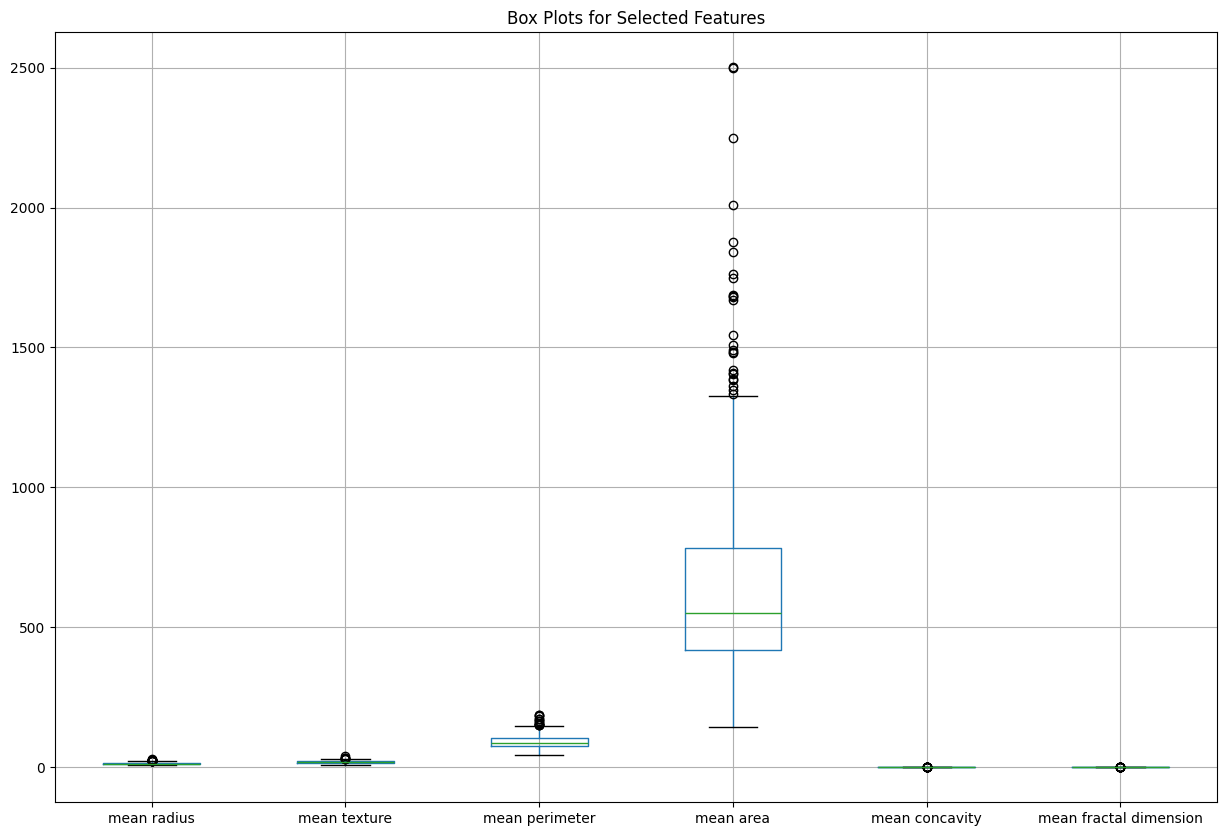

In [12]:
# Plot box plots for a subset of features (due to the large number of features)
# Select a few representative features for visualization
features_to_plot = ['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean concavity', 'mean fractal dimension']
plt.figure(figsize=(15, 10))
df[features_to_plot].boxplot()
plt.title("Box Plots for Selected Features")
plt.show()

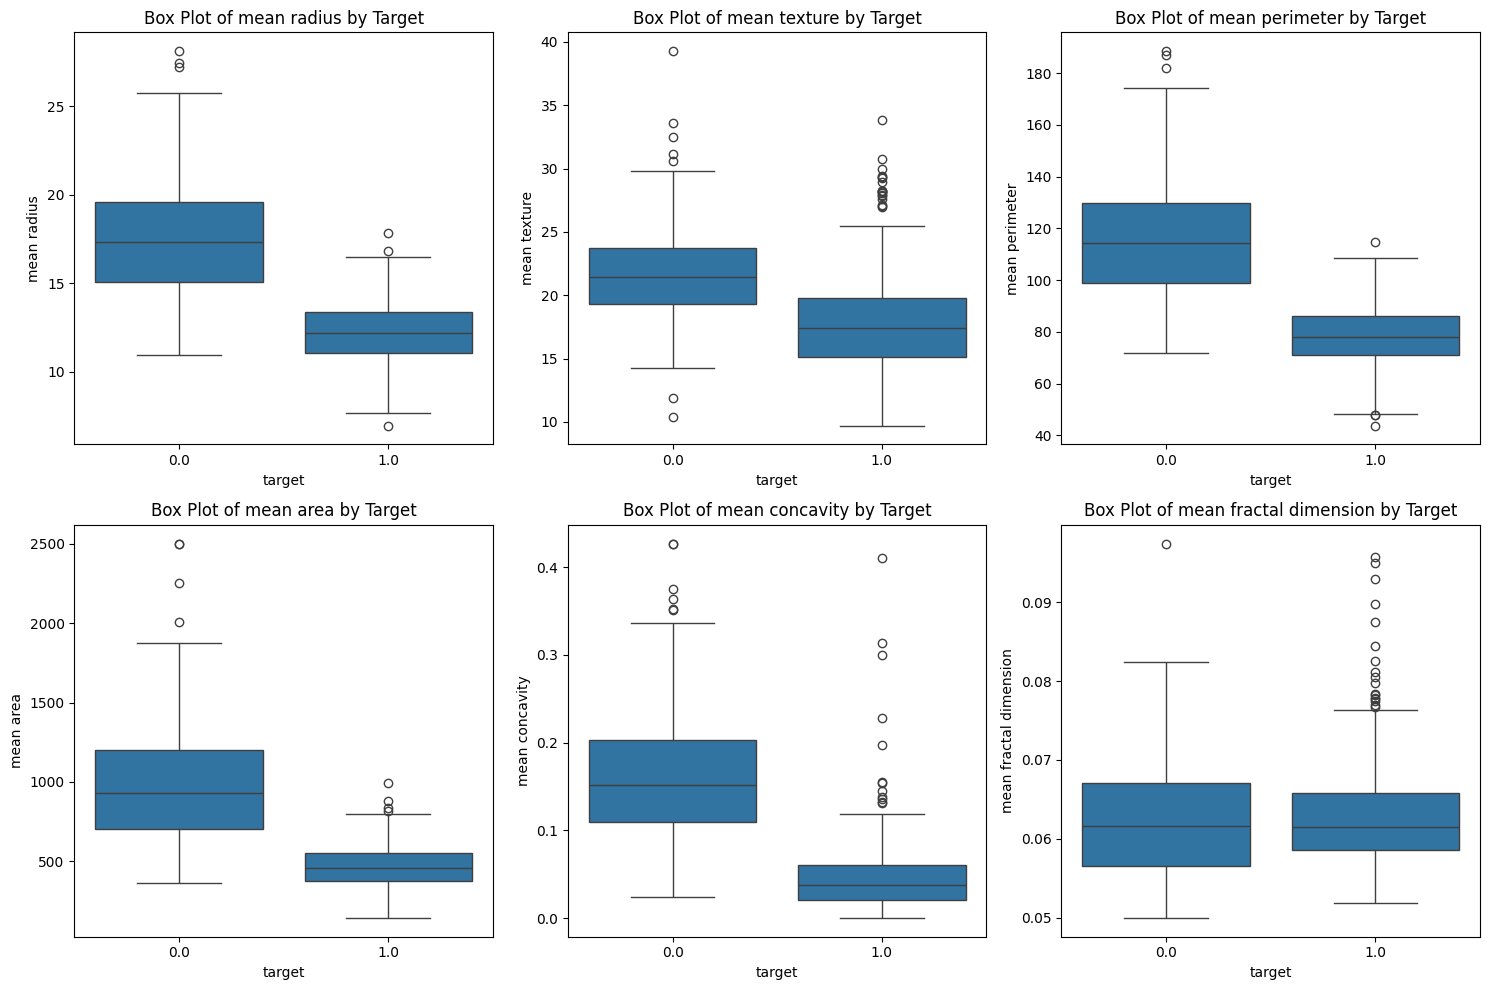

In [13]:
# Plot box plots for a subset of features, stratified by target
plt.figure(figsize=(15, 10))
for i, feature in enumerate(features_to_plot):
    plt.subplot(2, 3, i + 1) # Arrange plots in 2 rows, 3 columns
    sns.boxplot(x='target', y=feature, data=df)
    plt.title(f'Box Plot of {feature} by Target')
plt.tight_layout()
plt.show()


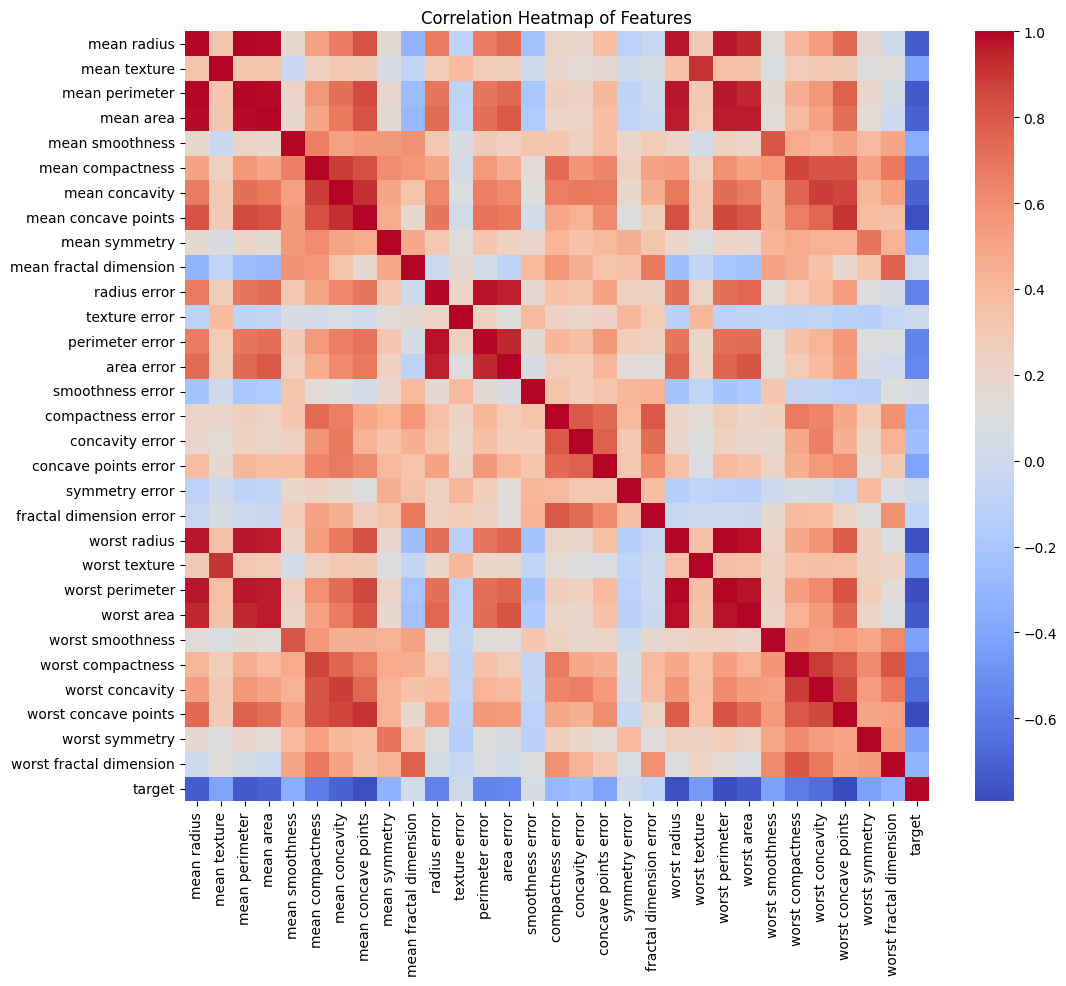

In [14]:
# Plot a correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.title("Correlation Heatmap of Features")
plt.show()

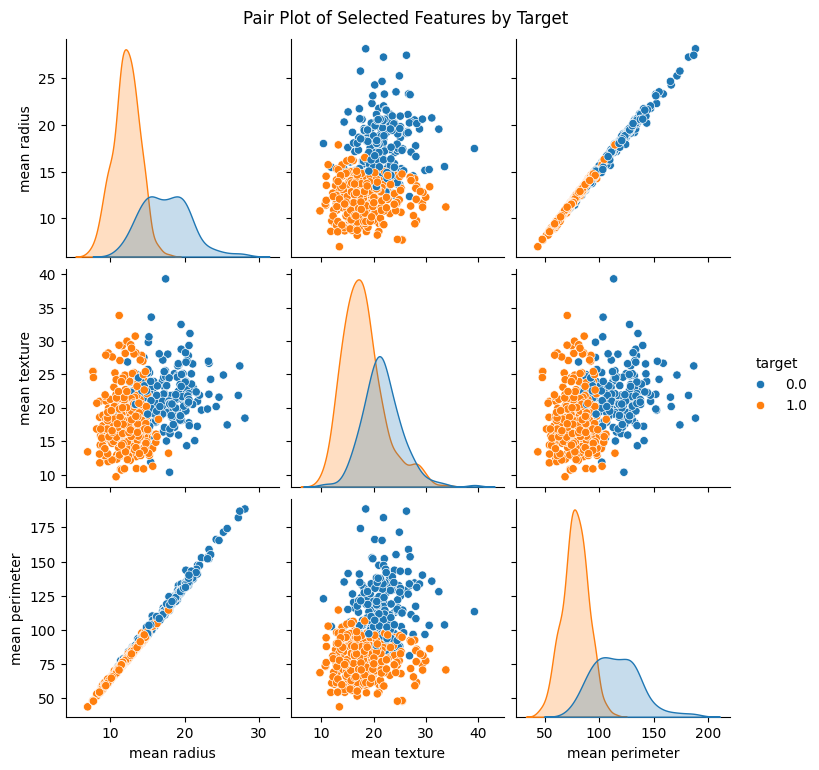

In [15]:
# Plot pair plots for a subset of features (can be computationally intensive for all features)
# Select a smaller subset for pair plotting
pairplot_features = ['mean radius', 'mean texture', 'mean perimeter', 'target']
sns.pairplot(df[pairplot_features], hue='target', diag_kind='kde')
plt.suptitle("Pair Plot of Selected Features by Target", y=1.02) # Adjust title position
plt.show()

In [16]:
# Split the data into X, y variable.
X = df.drop('target', axis = 1)
y = df['target']

In [19]:
# Split the data into training and testing part.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 5)

In [17]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler

In [18]:
# Initialize the StandardScaler
scaler = StandardScaler()

In [20]:
# Fit the scaler on the training data and transform both training and test data
# It's important to fit the scaler only on the training data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [21]:
# Convert the scaled arrays back to DataFrames.
# Keeping the original column names
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)


In [22]:
# Print the shape of the dataset.
print("Shape of scaled X_train:", X_train_scaled.shape)
print("Shape of scaled X_test:", X_test_scaled.shape)

print('Shape of y_train = ', y_train.shape)
print('Shape of y_test = ', y_test.shape)


Shape of scaled X_train: (455, 30)
Shape of scaled X_test: (114, 30)
Shape of y_train =  (455,)
Shape of y_test =  (114,)


In [ ]:
# Build the model and train the model.
model = SVC(kernel = 'rbf', gamma = 0.5, C =1.0 )
model.fit(X_train, y_train)

SVC(gamma=0.5)

In [ ]:
# Plot Decision Boundary
# Select only 'mean radius' and 'mean texture' for plotting the decision boundary
X_plot = X[['mean radius', 'mean texture']]
# Split the selected data into training and testing part.
X_train_plot, X_test_plot, y_train_plot, y_test_plot = train_test_split(X_plot, y, test_size = 0.2, random_state = 5)


In [ ]:
# Build the model and train the model using the selected features.
model_plot = SVC(kernel = 'rbf', gamma = 0.5, C =1.0 )
model_plot.fit(X_train_plot, y_train_plot)


SVC(gamma=0.5)

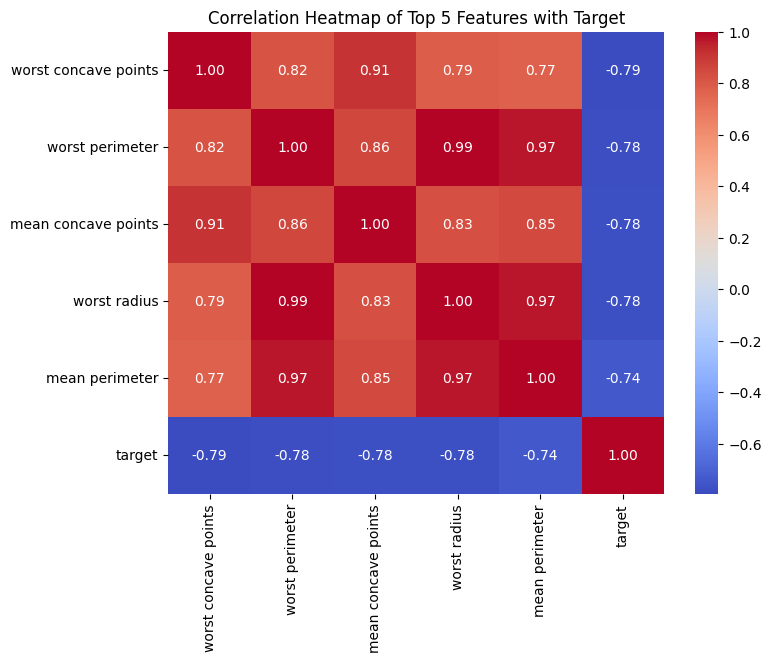

In [23]:
# Plot Correlation Matrix for Top 5 Features

# Calculate correlations with the target variable
correlation_with_target = df.corr()['target'].drop('target') # Drop target's self correlation

# Get the top 5 features with the strongest absolute correlation
top_5_features = correlation_with_target.abs().sort_values(ascending=False).head(5).index.tolist()

# Include the 'target' column in the list of features for the heatmap
features_for_heatmap = top_5_features + ['target']

# Calculate the correlation matrix for the selected features
correlation_matrix_top_5 = df[features_for_heatmap].corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix_top_5, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Top 5 Features with Target")
plt.show()

In [24]:
# Plot Decision Boundary for Top 2 Features

# Assuming 'top_5_features' list is already defined from the previous step
# Select the top 2 features from the list
feature1_name = top_5_features[0]
feature2_name = top_5_features[1]

In [25]:
# Select the data for these two features
X_plot = df[[feature1_name, feature2_name]]
y_plot = df['target'] # Use the original target variable

In [26]:
# Split the selected data for plotting
X_train_plot, X_test_plot, y_train_plot, y_test_plot = train_test_split(X_plot, y_plot, test_size = 0.2, random_state = 5)

In [27]:
# Build and train a model using only the selected two features
model_plot_top2 = SVC(kernel = 'rbf', gamma = 0.5, C =1.0 ) # Use the same hyperparameters as your original model
model_plot_top2.fit(X_train_plot, y_train_plot)

SVC(gamma=0.5)

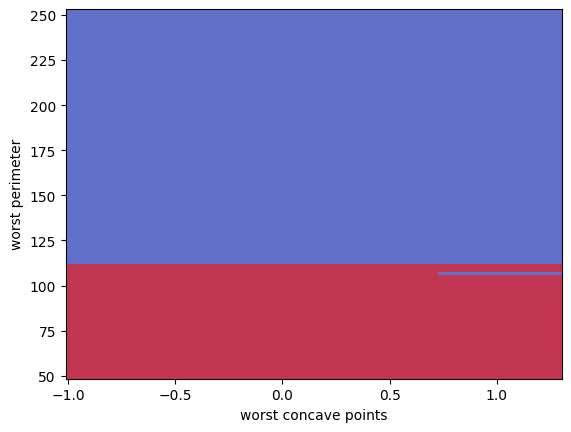

In [28]:
# Plot Decision Boundary
DecisionBoundaryDisplay.from_estimator(
    model_plot_top2,  # Use the model trained on the top 2 features
    X_plot,  # Use the full data for these 2 features for plotting the boundary space
    response_method="predict",
    cmap=plt.cm.coolwarm,
    alpha=0.8,
    xlabel= feature1_name,
    ylabel= feature2_name,
    plot_method="pcolormesh",
    shading="auto",
)

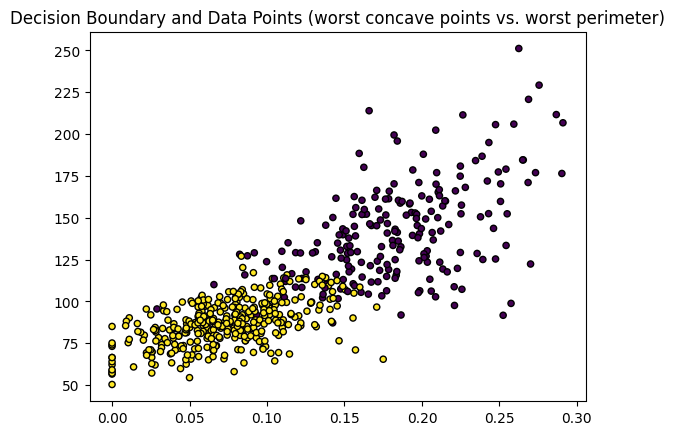

In [29]:
# Plot Scatter plot of the actual data points
plt.scatter(X_plot.iloc[:, 0], X_plot.iloc[:, 1],
            c=y_plot,
            s=20, edgecolors="k")
plt.title(f'Decision Boundary and Data Points ({feature1_name} vs. {feature2_name})')
plt.show()

In [31]:
# Retrain your original model with the scaled data
model_scaled = SVC(kernel = 'rbf', gamma = 0.5, C =1.0 ) # Use the same hyperparameters as your original model
model_scaled.fit(X_train_scaled, y_train)

SVC(gamma=0.5)

In [32]:
# Make predictions on scaled test data.
predictions_scaled = model_scaled.predict(X_test_scaled)

In [33]:
# Print accuracy, confusion_matrix and classification report of the model.

print('Model Evaluation (using scaled data):')
print('Accuracy: ', model_scaled.score(X_test_scaled, y_test))
print('\nConfusion Matrix:')
print(confusion_matrix(y_test, predictions_scaled))
print('\nClassification Report:')
print(classification_report(y_test, predictions_scaled))

Model Evaluation (using scaled data):
Accuracy:  0.6578947368421053

Confusion Matrix:
[[ 9 39]
 [ 0 66]]

Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      0.19      0.32        48
         1.0       0.63      1.00      0.77        66

    accuracy                           0.66       114
   macro avg       0.81      0.59      0.54       114
weighted avg       0.78      0.66      0.58       114



##### Model Interpretation
1. **Overall Accuracy:** An accuracy of 66% means the model correctly predicted the cancer type for about two-thirds of the instances in the test set. This is a starting point, but depending on the context of a medical application, you would likely aim for much higher accuracy.

2. **Confusion Matrix Insights:**
The most striking observation is the zero False Negatives (FN=0). This is a very positive outcome in a medical context, as it means the model did not incorrectly predict any malignant cases as benign. Missing a malignant case (a false negative) can have severe consequences.
However, the model has a significant number of False Positives (FP=39). This means it incorrectly predicted many benign cases as malignant. While less critical than false negatives, a high number of false positives can lead to unnecessary further testing and anxiety for patients.

3. **Classification Report Details:-**
- **Class 0.0 (Benign):**
 - High Precision (1.00): When the model predicts a case is benign, it is always correct. This is consistent with the zero false negatives.
Very Low Recall (0.19): The model only correctly identifies 19% of the actual benign cases. This is the consequence of the high number of false positives – many actual benign cases are being missed and predicted as malignant.

- **Class 1.0 (Malignant):**
  - Reasonable Precision (0.63): When the model predicts a case is malignant, it is correct about 63% of the time.
Perfect Recall (1.00): The model correctly identifies 100% of the actual malignant cases. This aligns with the zero false negatives.

- **F1-scores:** The F1-score is significantly higher for the malignant class (0.77) than for the benign class (0.32). This indicates that the model is performing much better at identifying malignant cases than benign ones.

### Conclusion

The model is extremely good at identifying malignant cases (high recall for class 1.0 and zero false negatives). However, it struggles with correctly identifying benign cases, frequently misclassifying them as malignant (low recall for class 0.0 and many false positives).

This kind of performance might be acceptable or even desirable in a scenario where minimizing false negatives (missing malignant cases) is the absolute priority, even at the cost of having a higher number of false positives. However, in a real-world medical setting, the high number of false positives would likely be problematic.